# M200b mass function on our clustered data 

each of the particle has a constant mass of 2.75491975e+43 g 

In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
centers  = np.loadtxt("../10MMBK/centers40000.txt")
labels  = np.loadtxt("../10MMBK/labels40000.txt")
density  = np.loadtxt("../10MMBK/density40000.txt")

In [3]:
print shape(centers)
print shape(labels)
print shape(density)

(40000, 3)
(2097152,)
(40000,)


In [4]:
yt.funcs.mylog.setLevel(50)

In [7]:
ds = yt.load("../../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
grid= ds.covering_grid(1,[0,0.0,0.0],dims=[32,32,32])
pcl_dens =  grid[('deposit','all_cic')]

In [14]:
mass = ad[('all', 'mass')]
particle_mass = ad[('all', 'particle_mass')]

In [19]:
print mass == particle_mass
print particle_mass

[ True  True  True ...,  True  True  True]
[  2.75491975e+43   2.75491975e+43   2.75491975e+43 ...,   2.75491975e+43
   2.75491975e+43   2.75491975e+43] g


In [20]:
# ds.field_info

In [21]:
m = 2.75491975e+43 #grams

$$M_{halo} = N*m $$

In [26]:
idx_list = []
N_list = []
for i in np.arange(40000): 
    idx = np.where(labels==i)[0]
    idx_list.append(idx)
    N_list.append(len(idx))

In [28]:
# print idx_list
# print N_list

In [29]:
idx = np.array([idx_list])
N = np.array([N_list])

In [32]:
M_halo = N*m

Actually I think the mass function just plots the number density so I dont think this is even necessary 

In [ ]:
plt.hist(M_halo)

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5933: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 40000)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


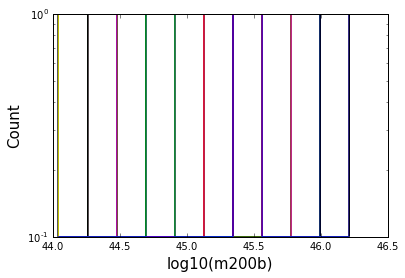

In [33]:
n, bins, patches  = plt.hist(np.log10(M_halo),log=True,histtype='step')#, normed=True)
plt.xlabel("log10(m200b)",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

In [ ]:
V = 10240.**3
n = N/V 

In [ ]:
plt.hist(n)

Comparing this result wiht 11_29_2015 notebook 

In [ ]:

plt.semilogy(bins[:-1],n/V,'s')
plt.xlabel("log10(m200b)",fontsize = 15)
plt.ylabel("dN/dlnM ",fontsize = 15)